In [7]:
import os
import scipy
from matplotlib.pyplot import specgram
import scipy.io.wavfile
import numpy as np
import glob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pylab

#importing data and looping through the files to check if they are valid wav files/read


genres_original = r"C:\Users\cantg\OneDrive\Documents\Datasets\genres_original"

for genre in os.listdir(genres_original):
    genre_path = os.path.join(genres_original, genre)
    if os.path.isdir(genre_path):
        for file in os.listdir(genre_path):
            if file.endswith('.wav'):
                file_path = os.path.join(genre_path, file)
                try:
                    sample_rate, X = scipy.io.wavfile.read(file_path)
                    print(sample_rate, X.shape)
                except ValueError:
                    print(f"File {file_path} could not be read as a WAV file.")

22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (661794,)
22050 (6

In [8]:
# Define the directory where genres are stored
genres_original = r"C:\Users\cantg\OneDrive\Documents\Datasets\genres_original"
GENRE_DIR = genres_original

# Function to create FFT and save it
def create_fft(fn):
    sample_rate, X = scipy.io.wavfile.read(fn)
    fft_features = abs(scipy.fft.fft(X)[:1000])
    base_fn, ext = os.path.splitext(fn)
    data_fn = base_fn + ".fft"
    np.save(data_fn, fft_features)

# Iterate over each genre and file to create FFT features
for genre in os.listdir(genres_original):
    genre_path = os.path.join(genres_original, genre)
    if os.path.isdir(genre_path):
        for file in os.listdir(genre_path):
            if file.endswith('.wav'):
                file_path = os.path.join(genre_path, file)
                try:
                    create_fft(file_path)
                    print(f"FFT created for {file_path}")
                except ValueError:
                    print(f"File {file_path} could not be read as a WAV file.")



FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00000.wav
FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00001.wav
FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00002.wav
FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00003.wav
FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00004.wav
FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00005.wav
FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00006.wav
FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00007.wav
FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00008.wav
FFT created for C:\Users\cantg\OneDrive\Documents\Datasets\genres_original\blues\blues.00009.wav
FFT created for C:\Users\cantg

In [9]:
# Function to read FFT features and prepare training data
def read_fft(genre_list, base_dir=GENRE_DIR):
    X = []
    y = []
    for label, genre in enumerate(genre_list):
        genre_dir = os.path.join(base_dir, genre, "*.fft.npy")
        file_list = glob.glob(genre_dir)
        for fn in file_list:
            fft_features = np.load(fn)
            X.append(fft_features[:1000])
            y.append(label)
    return np.array(X), np.array(y)

# Define the genres
genre_list = ["classical", "jazz", "country", "pop", "rock", "metal"]
X, y = read_fft(genre_list, GENRE_DIR)




In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


y_pred: [1 3 5 4 1 2 0 5 1 3 0 1 2 5 2 1 0 2 4 0 0 4 3 2 5 2 0 1 5 4 5 4 0 2 4 1 4
 2 5 3 1 0 5 1 1 2 5 2 0 5 2 2 5 1 4 3 2 5 1 2 0 2 3 2 5 0 4 2 1 4 2 4 4 4
 3 4 2 1 5 5 4 3 3 2 0 4 1 2 3 2 4 3 0 3 2 2 2 0 2 0 0 3 3 2 3 4 1 5 2 2 4
 5 4 2 1 2 3 5 1 2]
y_test: [1 4 5 0 1 2 0 4 0 3 0 1 1 5 3 2 0 2 1 0 0 5 5 5 3 5 0 1 5 4 5 1 0 2 1 4 1
 5 4 2 3 0 5 5 0 1 4 1 0 4 2 2 1 5 5 3 2 1 1 1 0 1 3 5 5 0 5 5 0 3 3 0 4 3
 4 5 3 2 5 4 2 4 5 3 0 0 1 2 3 2 2 5 0 3 2 2 2 0 4 0 0 2 5 3 0 4 1 2 2 4 2
 4 5 5 3 4 3 1 4 4]
Confusion Matrix: [[16  3  0  1  3  0]
 [ 0  7  5  0  4  3]
 [ 0  2 12  2  3  1]
 [ 0  2  5  6  2  1]
 [ 0  2  4  3  3  6]
 [ 0  2  6  4  5  7]]


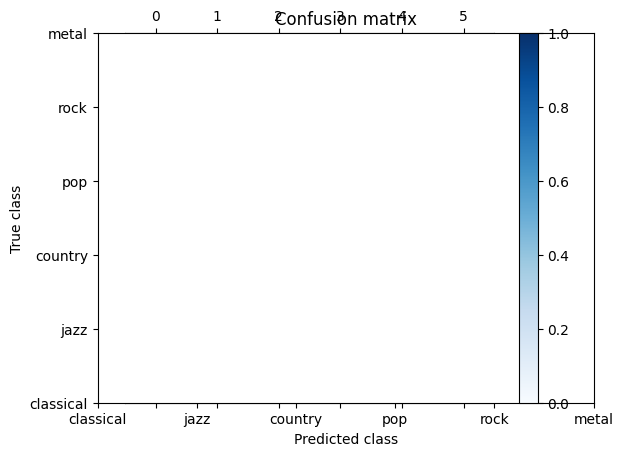

In [13]:
from matplotlib import pylab

def plot_confusion_matrix(cm, genre_list, name, title):
    pylab.clf()
    pylab.matshow(cm, fignum=False, cmap='Blues', vmin=0, vmax=1.0)
    ax = pylab.axes()
    ax.set_xticks(range(len(genre_list)))
    ax.set_xticklabels(genre_list)
    ax.xaxis.set_ticks_position("bottom")
    ax.set_yticks(range(len(genre_list)))
    ax.set_yticklabels(genre_list)
    pylab.title(title)
    pylab.colorbar()
    pylab.grid(False)
    pylab.xlabel('Predicted class')
    pylab.ylabel('True class')
    pylab.grid(False)
    pylab.show()

  # Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print out y_pred, y_test, and cm for debugging
print("y_pred:", y_pred)
print("y_test:", y_test)
print("Confusion Matrix:", cm)

# Plot the confusion matrix without normalizing
plot_confusion_matrix(cm, genre_list, 'Confusion matrix', 'Confusion matrix')